In [123]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [124]:
def cube_color_slicing(img, color, spread_range):
    """
    img: image to be processed
    color: color to be kept
    spread_range: range of color to be kept
    """

    lower = np.array([color[0]-spread_range, color[1]-spread_range, color[2]-spread_range])
    upper = np.array([color[0]+spread_range, color[1]+spread_range, color[2]+spread_range])

    mask = cv.inRange(img, lower, upper)

    # Change color not in mask to blue
    res = img.copy()
    res[mask != 255] = [128, 0, 0]

    return res

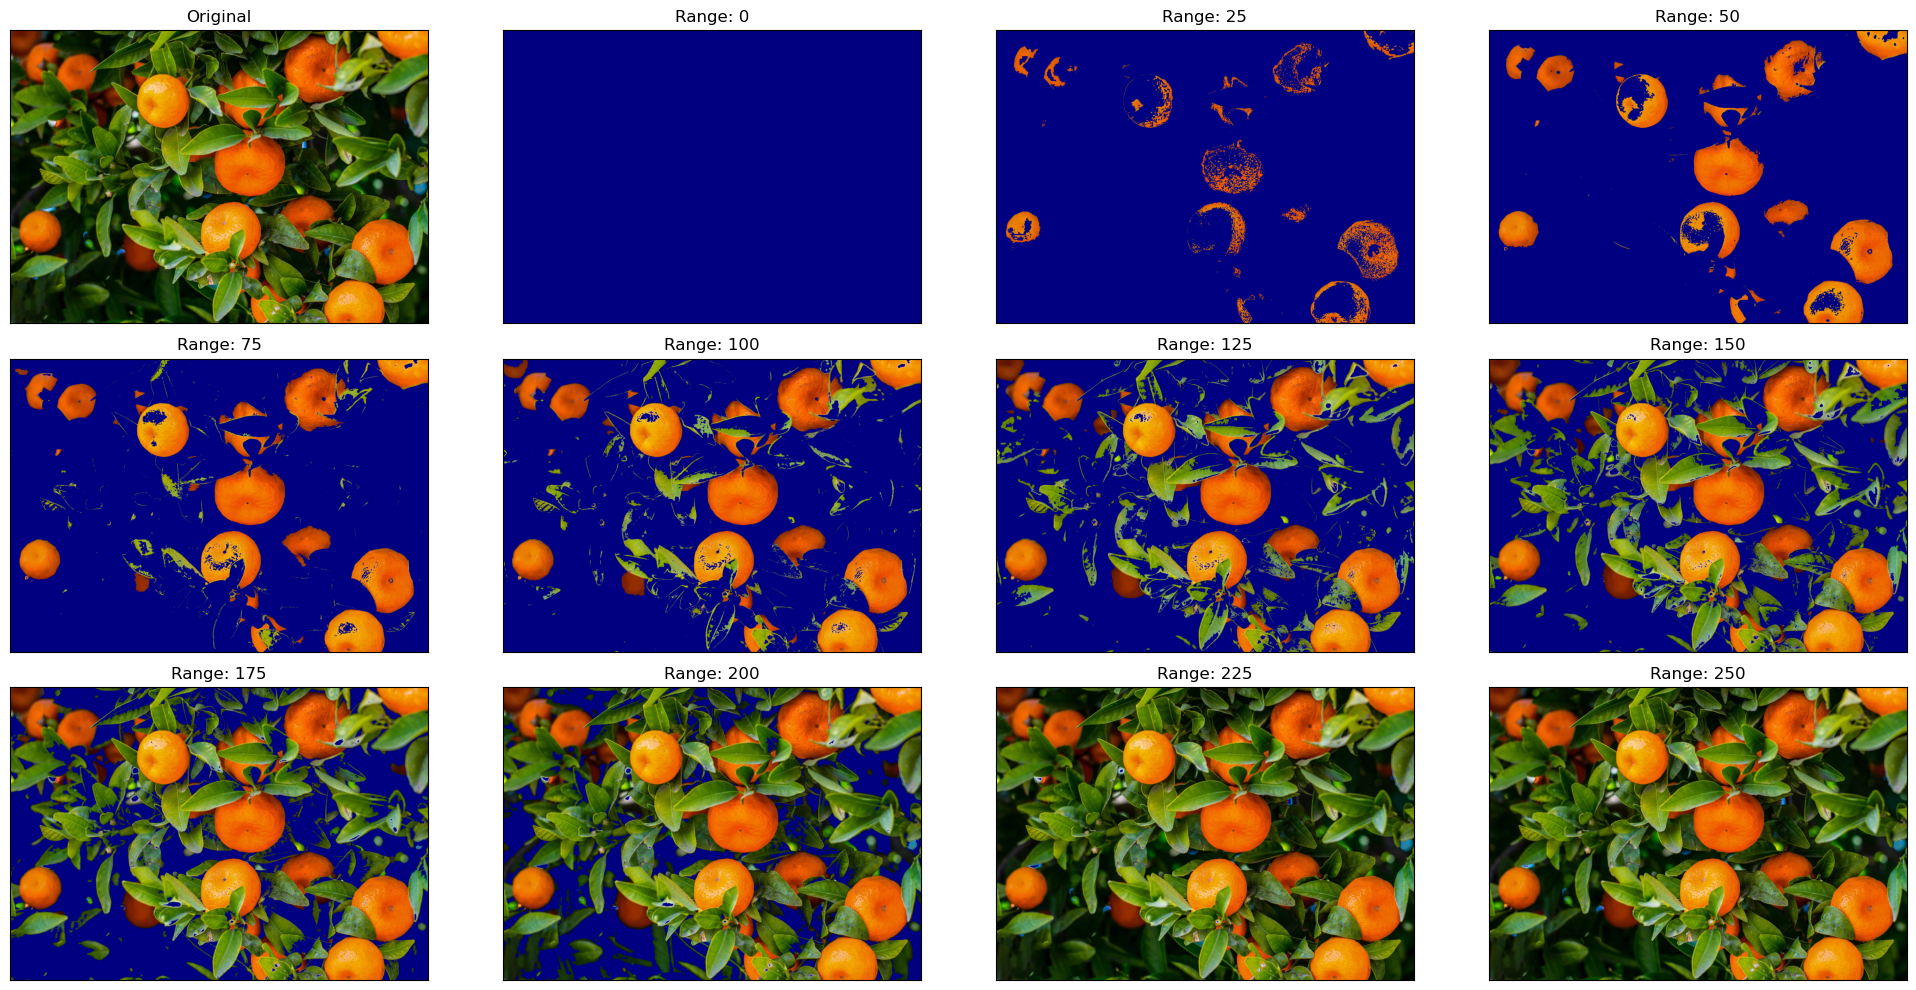

In [125]:
orange_path = "./img/oranges.jpg"
orange = cv.imread(orange_path)
orange_color = (1, 108, 214)

sprad_range = np.arange(0, 255, 25)

nPics = len(sprad_range) + 1

column = 4
row = int(np.ceil(nPics/column))

fig, axs = plt.subplots(row, column, figsize=(20, 10))

axs[0, 0].imshow(cv.cvtColor(orange, cv.COLOR_BGR2RGB))
axs[0, 0].set_title("Original")

for i in range(1, nPics):
    axs[int(i/column), i % column].imshow(cv.cvtColor(cube_color_slicing(orange, orange_color, sprad_range[i-1]), cv.COLOR_BGR2RGB))
    axs[int(i/column), i % column].set_title("Range: " + str(sprad_range[i-1]))

# Remove unused axes
for i in range(nPics, row*column):
    fig.delaxes(axs[int(i/column), i % column])

# Remove axis
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])
fig.tight_layout()
plt.show()